In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [30]:
df_test= pd.read_csv('data/diabetes.csv')

In [31]:
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
df_test['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/home/mukesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


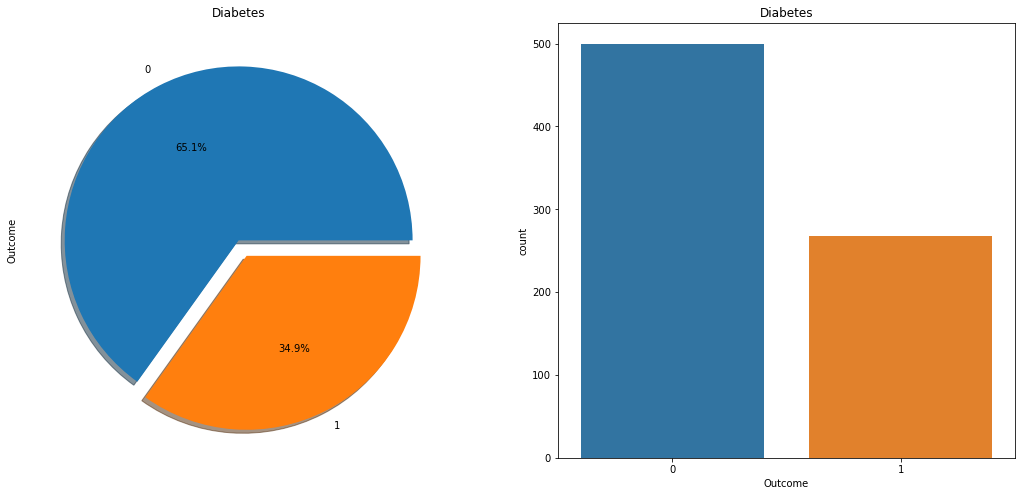

In [35]:
f,ax= plt.subplots(1,2,figsize=(18,8))
df_test['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Diabetes')
sns.countplot('Outcome', data=df_test,ax=ax[1])
ax[1].set_title('Diabetes')
plt.show()

In [36]:
df_test.groupby(['Age','Outcome'])['Outcome'].count()

Age  Outcome
21   0          58
     1           5
22   0          61
     1          11
23   0          31
                ..
68   0           1
69   0           2
70   1           1
72   0           1
81   0           1
Name: Outcome, Length: 96, dtype: int64

/home/mukesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


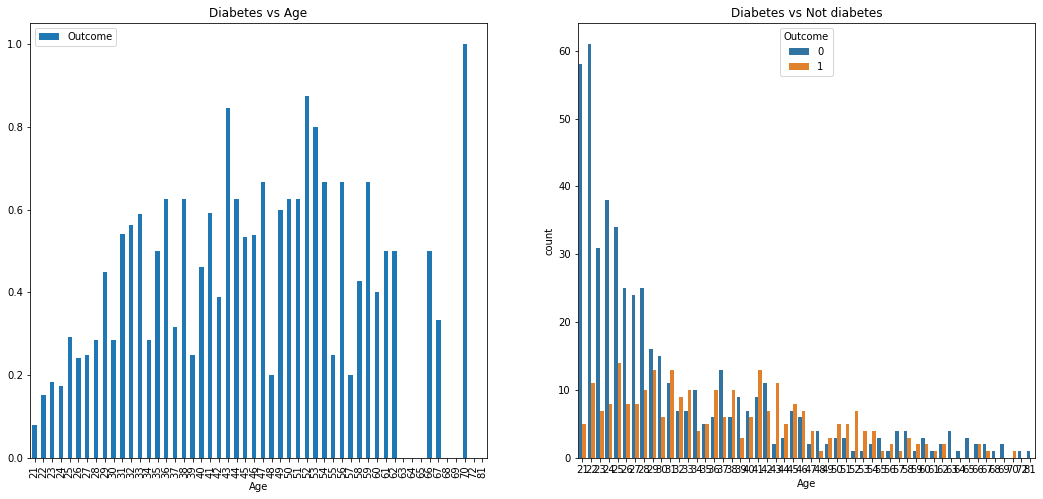

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_test[['Age', 'Outcome']].groupby(['Age']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Diabetes vs Age')
sns.countplot('Age', hue='Outcome', data=df_test,ax=ax[1])
ax[1].set_title('Diabetes vs Not diabetes')
plt.show()

/home/mukesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


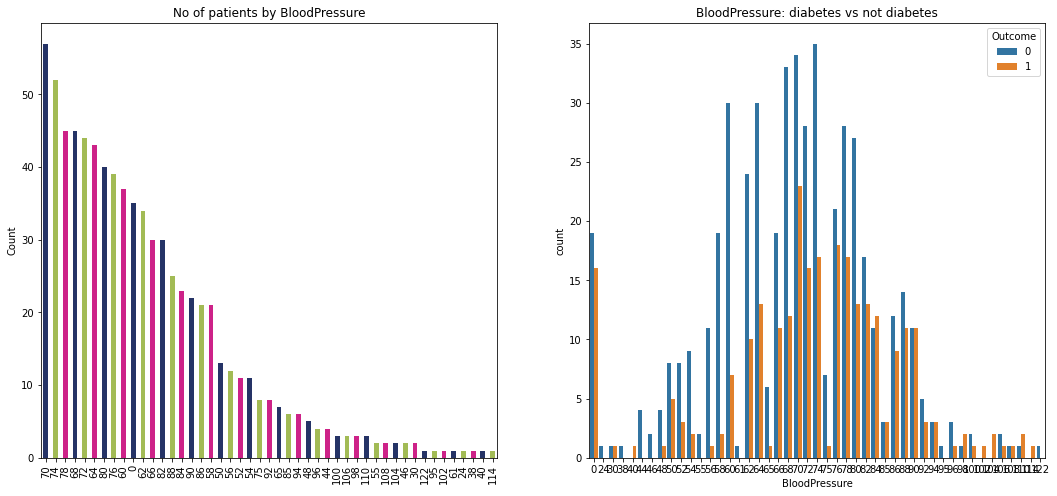

In [38]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_test['BloodPressure'].value_counts().plot.bar(color=['#253366', '#a2bb55', '#cd2288'], ax=ax[0])
ax[0].set_title('No of patients by BloodPressure')
ax[0].set_ylabel('Count')
sns.countplot('BloodPressure', hue='Outcome', data=df_test,ax=ax[1])
ax[1].set_title('BloodPressure: diabetes vs not diabetes')
plt.show()

In [39]:
df_test[df_test['BloodPressure']==60]['Outcome'].value_counts()

0    30
1     7
Name: Outcome, dtype: int64

In [40]:
df_test['Age'].mean()

33.240885416666664

In [41]:
print('Oldest patients was of', df_test['Age'].max(), 'Years')
print('Average age patients was of', df_test['Age'].mean(), 'Years')
print('youngest patients was of', df_test['Age'].min(), 'Years')

Oldest patients was of 81 Years
Average age patients was of 33.240885416666664 Years
youngest patients was of 21 Years


/home/mukesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mukesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


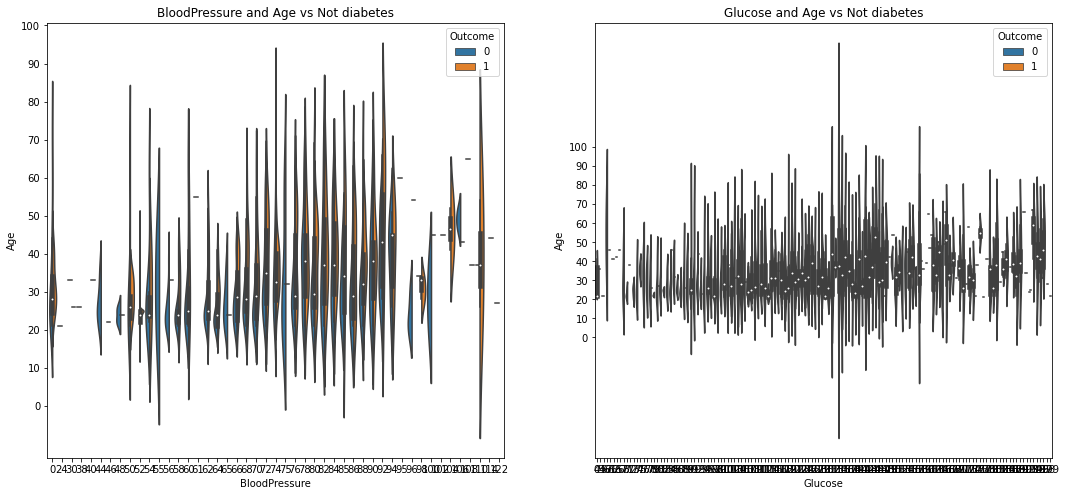

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("BloodPressure", "Age", hue='Outcome',data=df_test, split=True,ax=ax[0])
ax[0].set_title('BloodPressure and Age vs Not diabetes')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Glucose","Age", hue="Outcome", data=df_test,split=True,ax=ax[1])
ax[1].set_title('Glucose and Age vs Not diabetes')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [43]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [44]:
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
nb = GaussianNB()

In [45]:
models = {'svc':svc, 'knn':knn, 'dtc':dtc, 'nb':nb}

In [46]:
x,y = df_test.drop('Outcome', axis = 1), df_test['Outcome']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=200)

In [48]:
model_accuracy={}

for model in models.keys():
    mod=models[model].fit(x_train,y_train)
    predict=mod.predict(x_test)
    print(f'{model}')
    print(confusion_matrix(predict, y_test))
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(y_test,predict)})
        
model_accuracy

svc
[[97 19]
 [ 9 29]]
knn
[[80 15]
 [26 33]]
dtc
[[85 15]
 [21 33]]
nb
[[92 16]
 [14 32]]


{'svc': 0.8181818181818182,
 'knn': 0.7337662337662337,
 'dtc': 0.7662337662337663,
 'nb': 0.8051948051948052}

In [49]:
params={
    'knn': {'n_neighbors':[3,5,7,9,11,13,15],
    'metric':['cosine','euclidean','manhattan'],
    'weights':['uniform','distance']},
    
    'svc':{
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':['rbf','linear']},
    
    'dtc':{
        'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10,12]},
    
    'nb':{
        'priors':[None],
    'var_smoothing':[0.00000001,0.000000001,0.00000001]
    }
}

In [50]:
model_accuracy={}
for model in models.keys():
    mod=GridSearchCV(
    models[model],
    params[model],
    verbose=1,
    cv=20,
    n_jobs=-1
    )

    gridsearch_result=mod.fit(x_train,y_train)
    predict=mod.predict(x_test)
    print(f"{model}: ", gridsearch_result.best_estimator_)
    print(f"{model}")
    print(confusion_matrix(predict,y_test))
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(y_test,predict)})

Fitting 20 folds for each of 18 candidates, totalling 360 fits
svc:  SVC(C=0.1, gamma=1, kernel='linear')
svc
[[95 18]
 [11 30]]
Fitting 20 folds for each of 42 candidates, totalling 840 fits
knn:  KNeighborsClassifier(metric='euclidean', n_neighbors=13)
knn
[[90 17]
 [16 31]]
Fitting 20 folds for each of 12 candidates, totalling 240 fits
dtc:  DecisionTreeClassifier(max_depth=4)
dtc
[[75  8]
 [31 40]]
Fitting 20 folds for each of 3 candidates, totalling 60 fits
nb:  GaussianNB(var_smoothing=1e-08)
nb
[[92 16]
 [14 32]]


In [51]:
model_accuracy

{'svc': 0.8116883116883117,
 'knn': 0.7857142857142857,
 'dtc': 0.7467532467532467,
 'nb': 0.8051948051948052}